# Analyzying the loan Case Study

## Importing the Libraries required for EDA

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

## 1. Reading the Input Data from File

In [344]:
df = pd.read_csv(r"C:\Users\user\Downloads\EDA\Data sets\loan\loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Understanding structure of the Data

In [345]:
# Getting the Dataframe dimensions
df.shape

(39717, 111)

In [346]:
# Getting the columns information
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [347]:
# Basic Info of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [348]:
# Getting basic statistical details of the data frame
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

## 3. Data Quality Check and Correction

### 3.1 Missing values for columns and rows

In [349]:
#chechikng missing values for columns
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [350]:
#checking missing values for rows
df.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

### 3.2 Removing the columns with high percentage of missing values(>60%)

In [351]:
# Here thresh is for non-null values
# Dropping columns with >60% of null values 
df = df.dropna(thresh= (0.4*len(df)),axis = 1)

In [352]:
df.shape

(39717, 54)

In [353]:
#re-checking columns with missing values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [354]:
#drop rows with null values 
df.dropna(subset=['emp_title','title','emp_length','last_pymnt_d','revol_util'],inplace=True)


In [355]:
#re-checking columns with missing values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12030
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### 3.3 Removing the columns with single value or zero columns

In [356]:
unique_columns={}
for i in df.columns:
    unique = df[i].unique()
    count = unique.size
    unique_columns[i]=count
unique_columns

{'id': 37087,
 'member_id': 37087,
 'loan_amnt': 873,
 'funded_amnt': 1030,
 'funded_amnt_inv': 7800,
 'term': 2,
 'int_rate': 368,
 'installment': 14749,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28683,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 4986,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 3,
 'pymnt_plan': 1,
 'url': 37087,
 'desc': 24829,
 'purpose': 14,
 'title': 18340,
 'zip_code': 818,
 'addr_state': 50,
 'dti': 2857,
 'delinq_2yrs': 11,
 'earliest_cr_line': 510,
 'inq_last_6mths': 9,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21010,
 'revol_util': 1082,
 'total_acc': 80,
 'initial_list_status': 1,
 'out_prncp': 1064,
 'out_prncp_inv': 1065,
 'total_pymnt': 35450,
 'total_pymnt_inv': 35161,
 'total_rec_prncp': 7379,
 'total_rec_int': 33095,
 'total_rec_late_fee': 1246,
 'recoveries': 3652,
 'collection_recovery_fee': 2414,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 33005,
 'last_credit_pull_d': 106,
 'collections_12_mths_ex_med': 2,
 'policy_

In [357]:
#dropping columns with single values
single_val_cols= ['application_type','initial_list_status','pymnt_plan','policy_code','delinq_amnt','acc_now_delinq']
df = df.drop(single_val_cols ,axis = 1)
df.shape

(37087, 48)

In [358]:
#dropping columns with only most of the values as Zero
zero_cols=['pub_rec_bankruptcies','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med']
df = df.drop(zero_cols, axis = 1)
df.shape

(37087, 44)

In [359]:
#dopping columns with most of the values are distinct
zero_cols=['id','member_id','emp_title','url','desc','title']
df = df.drop(zero_cols, axis = 1)
df.shape

(37087, 38)

### 3.4 Detecting and Removing Outlier

<Axes: xlabel='loan_amnt'>

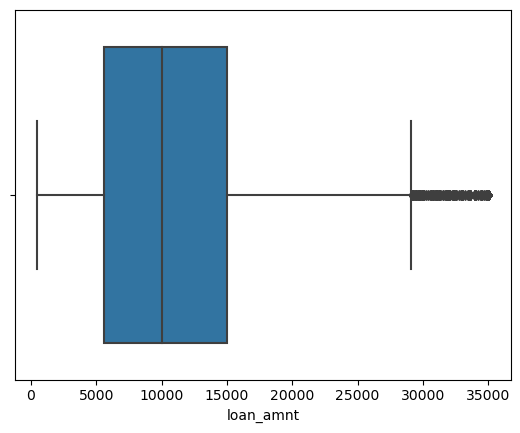

In [360]:
#Box plot for Loan Amount
sns.boxplot(x=df['loan_amnt'])

In [361]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

9400.0


In [362]:
#removing outliers in Loan Amount
df = df[~((df['loan_amnt'] < (Q1 - 1.5 * IQR)) |(df['loan_amnt'] > (Q3 + 1.5 * IQR)))]
df.shape

(35953, 38)

<Axes: xlabel='loan_amnt'>

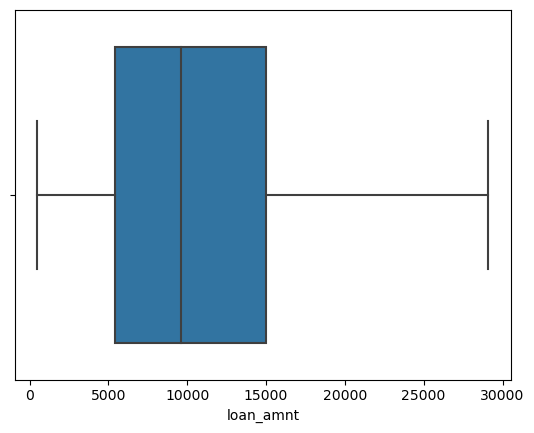

In [363]:
#Box plot for Loan Amount
sns.boxplot(x=df['loan_amnt'])

<Axes: xlabel='annual_inc'>

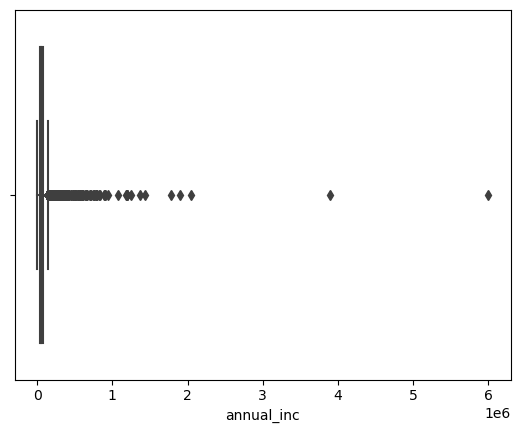

In [364]:
#Box plot for Annual Income 
sns.boxplot(x=df['annual_inc'])

In [365]:
AQ1 = df['annual_inc'].quantile(0.25)
AQ3 = df['annual_inc'].quantile(0.75)
AIQR = AQ3-AQ1
print(AIQR)

39200.0


In [366]:
#removing outliers in Annual Income
df = df[~((df['annual_inc'] < (AQ1 - 1.5 * AIQR)) |(df['annual_inc'] > (AQ3 + 1.5 * AIQR)))]
df.shape

(34233, 38)

<Axes: xlabel='annual_inc'>

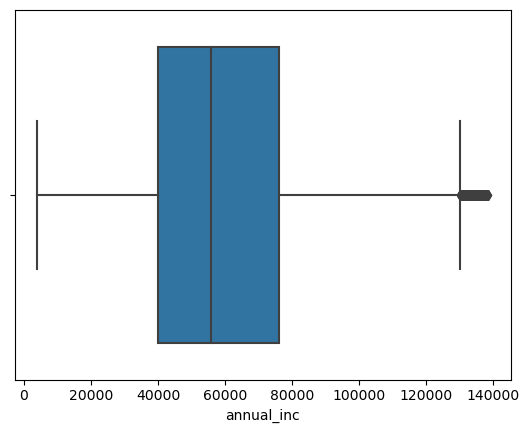

In [367]:
#Box plot for Annual Income 
sns.boxplot(x=df['annual_inc'])

## 4. Data Analysis

### 4.1 Divide into categorical and Numerical data 

In [368]:
df['inq_last_6mths']=df['inq_last_6mths'].astype(object)

In [369]:
#Categorical Columns
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,inq_last_6mths,revol_util,last_pymnt_d,last_credit_pull_d
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,5,9.40%,Apr-13,Sep-13
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,1,21%,Jan-15,Apr-16
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,972xx,OR,Jan-96,0,53.90%,May-16,May-16
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,Nov-04,3,28.30%,Jan-15,Jan-16
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,Jul-05,1,85.60%,May-16,May-16


In [370]:
#Continuous/Numercial columns
df_cont = df.select_dtypes(include = ['int64','float64'])
df_cont.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
1,2500,2500,2500.00,59.83,30000.00,1.00,0,3,0,1687,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
3,10000,10000,10000.00,339.31,49200.00,20.00,0,10,0,5598,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.00,67.79,80000.00,17.94,0,15,0,27783,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79
5,5000,5000,5000.00,156.46,36000.00,11.20,0,9,0,7963,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03
6,7000,7000,7000.00,170.08,47004.00,23.51,0,7,0,17726,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76


In [371]:
df_cat.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'inq_last_6mths', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [372]:
df_cont.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

### 4.2 Univariate Analysis

In [373]:
#------------------------
Irrelevant_cols = ['issue_d','zip_code', 'addr_state', 'earliest_cr_line', 'revol_util','last_pymnt_d', 'last_credit_pull_d']
df_cat = df_cat.drop(Irrelevant_cols,axis=1)
df_cat.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'inq_last_6mths'],
      dtype='object')

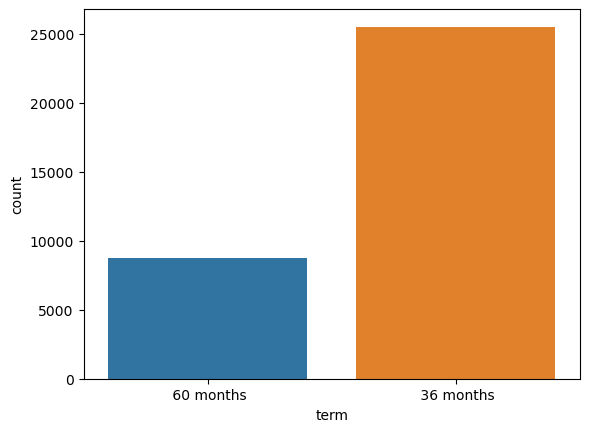

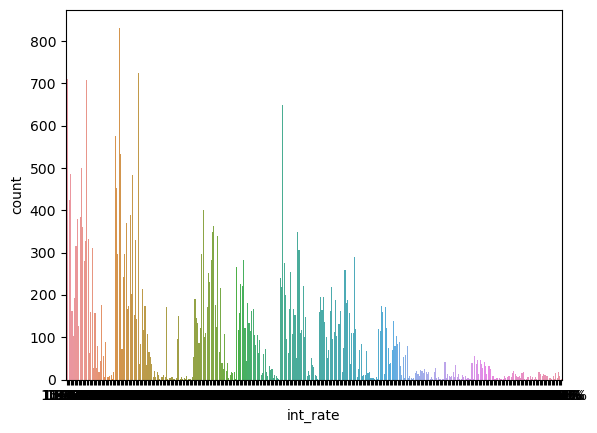

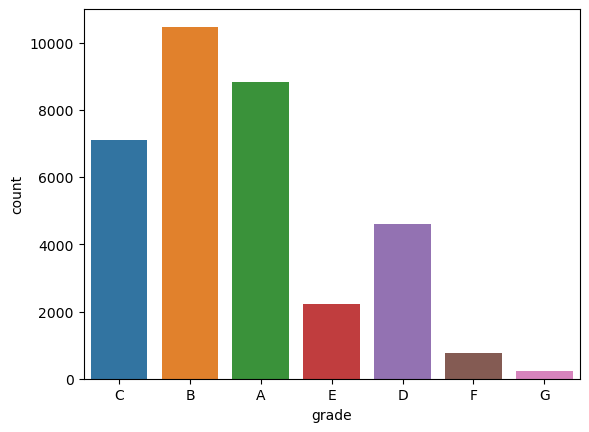

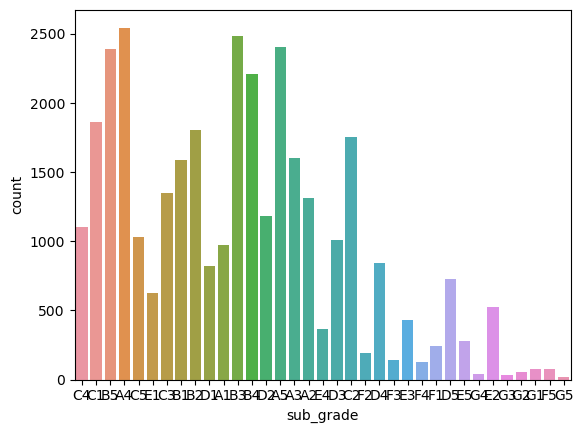

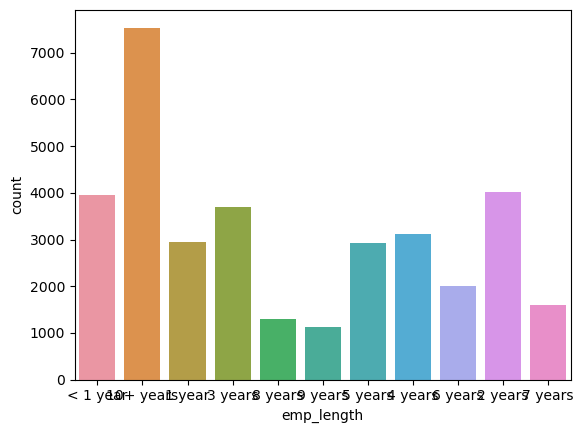

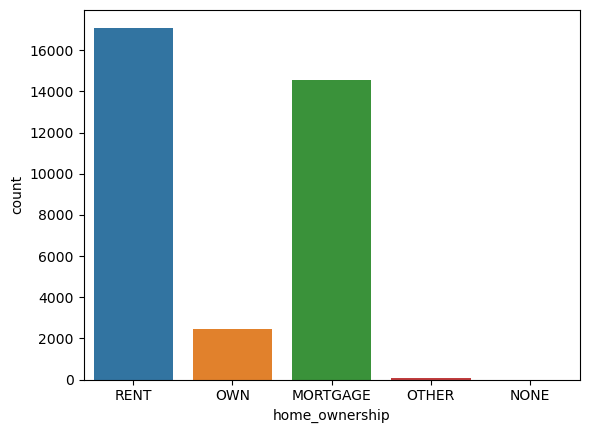

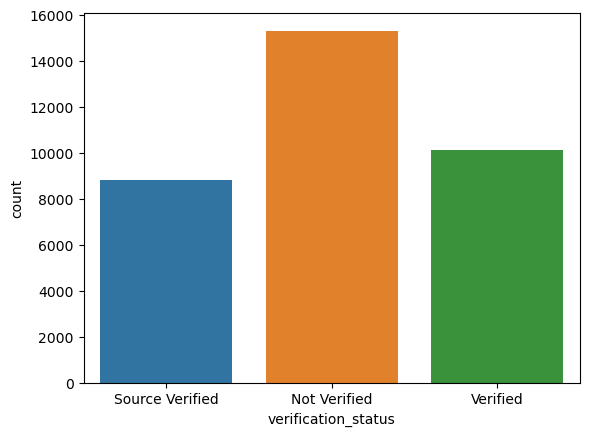

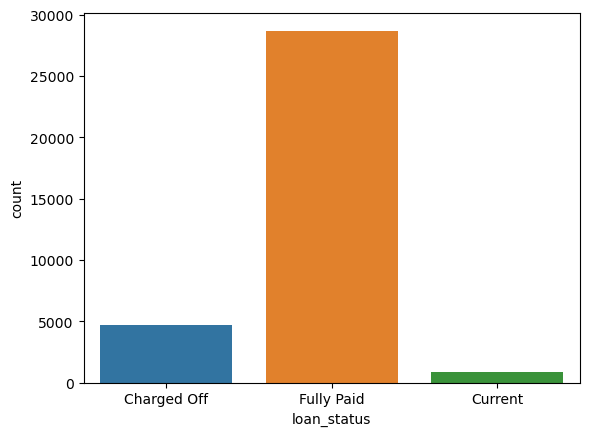

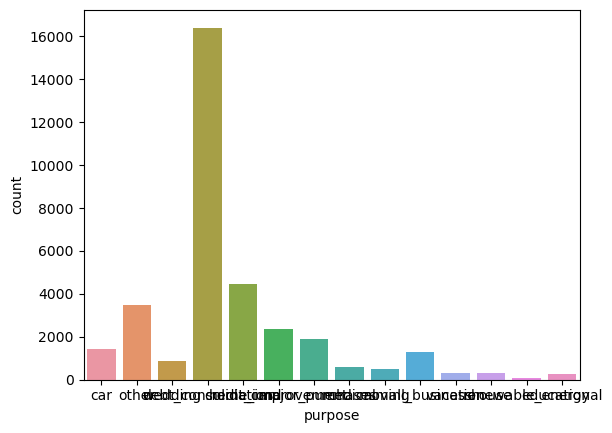

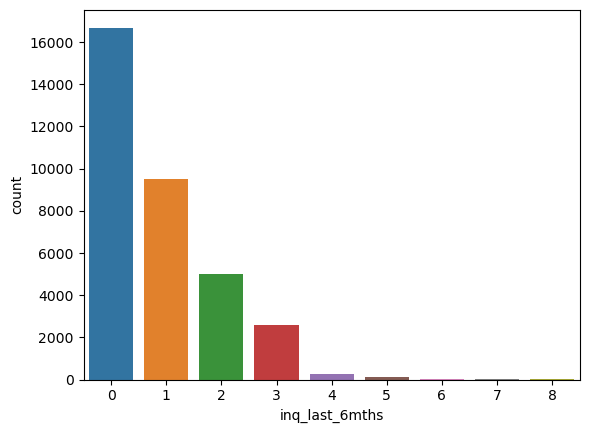

In [374]:
#Univariate analysis for Categorical Columns
for i in df_cat.columns:
    sns.countplot(x=df_cat[i])
    plt.show()
    

In [375]:
#----------------
Irrelevant__cont_cols = ['delinq_2yrs', 'pub_rec', 'out_prncp']
df_cont = df_cont.drop(Irrelevant__cont_cols,axis=1)
df_cont.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

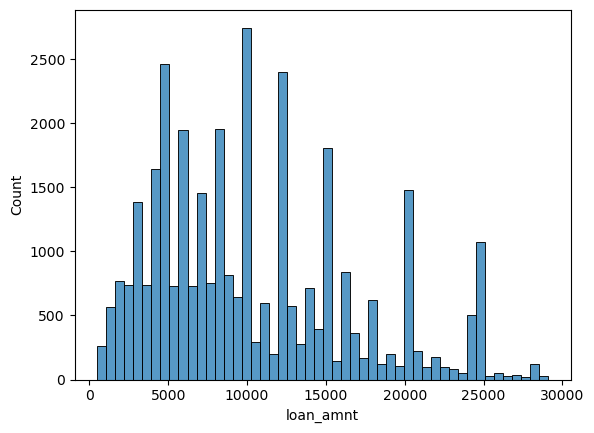

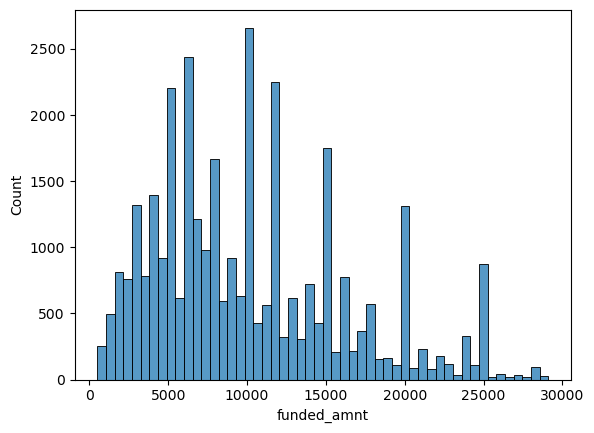

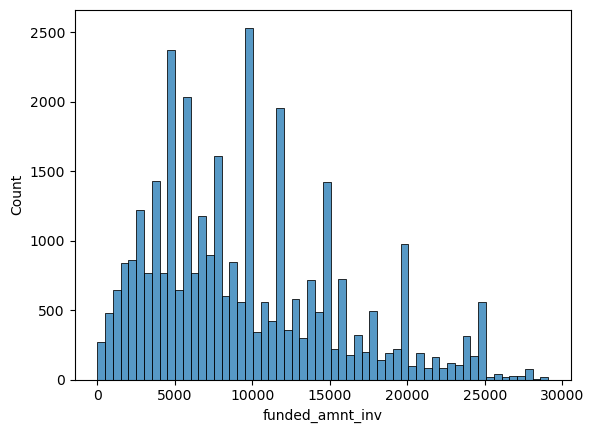

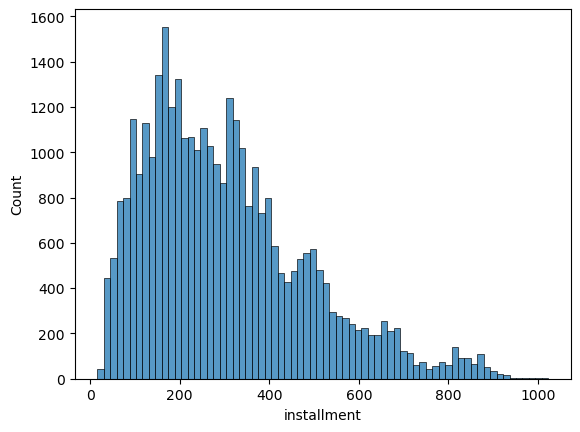

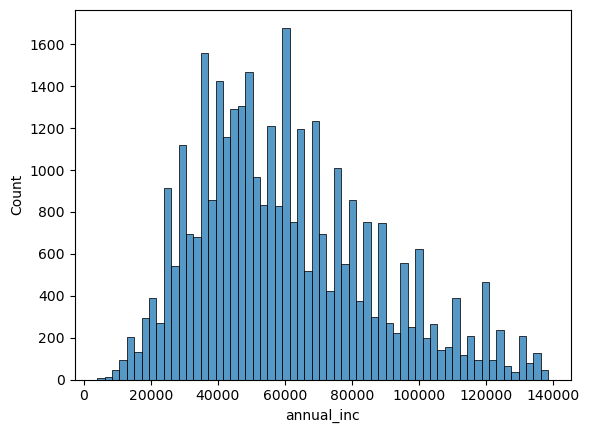

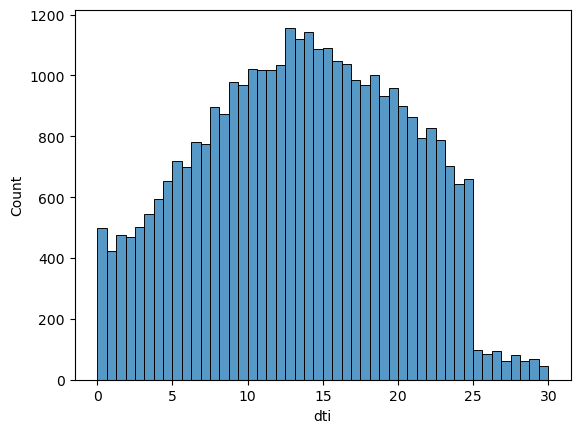

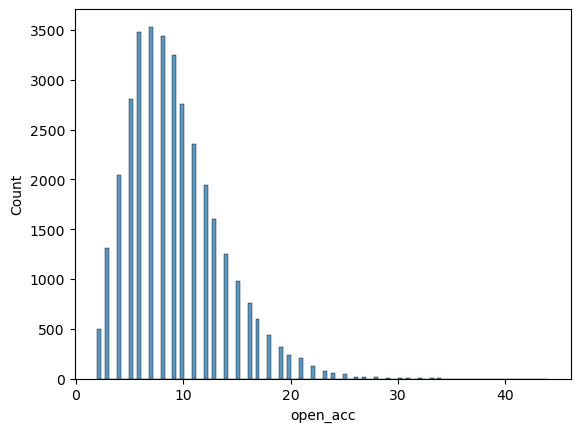

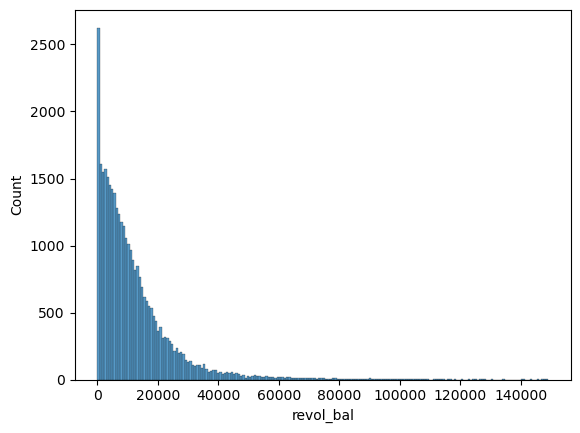

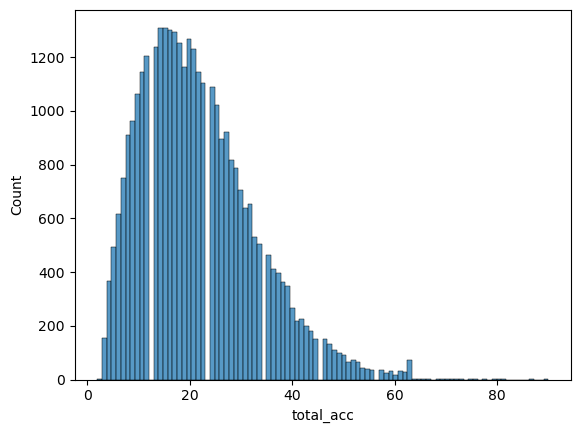

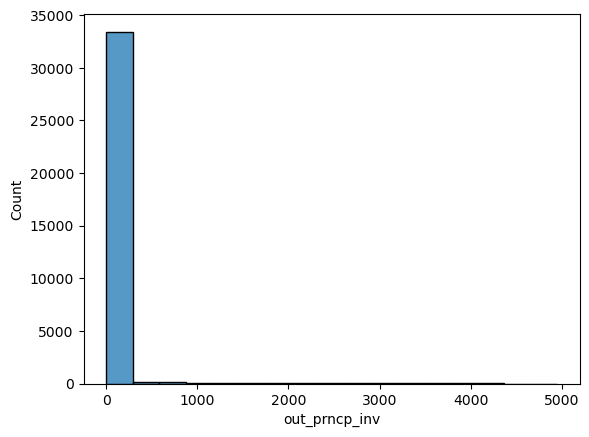

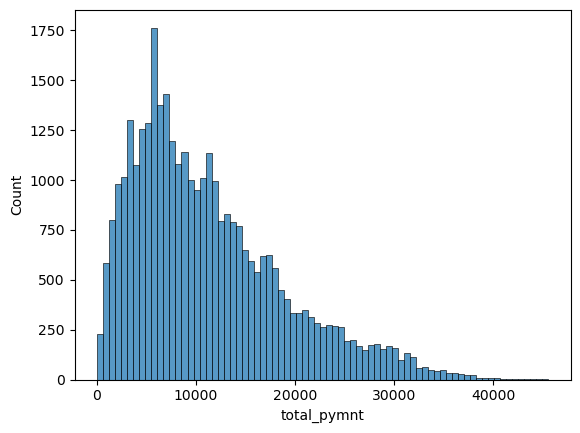

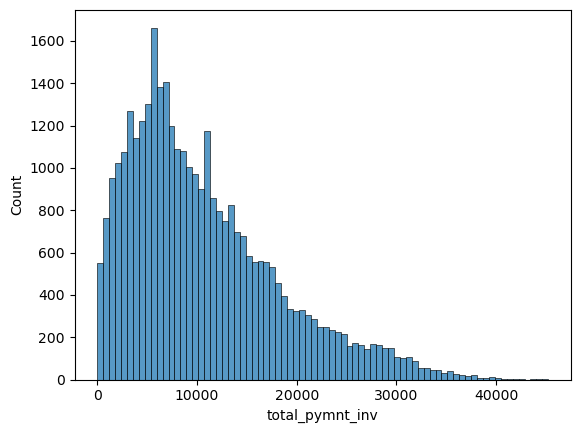

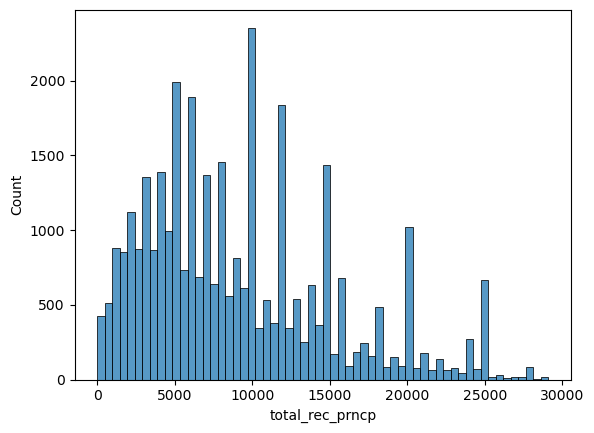

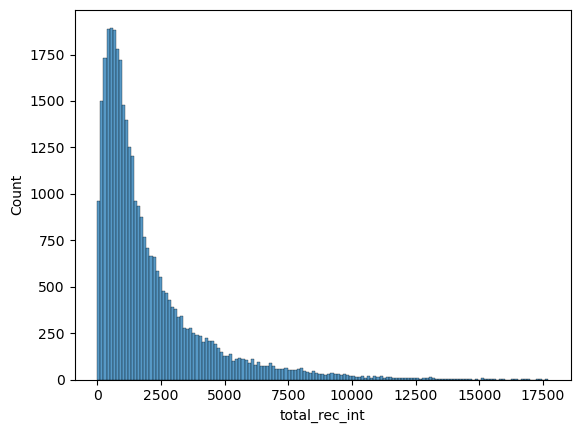

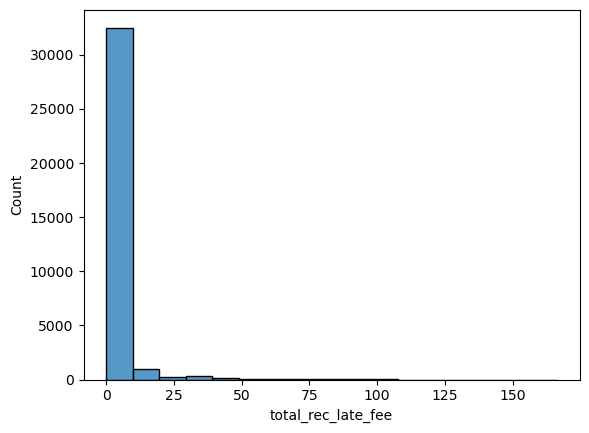

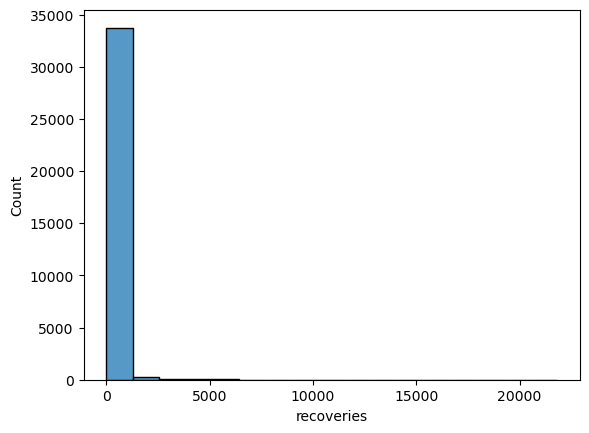

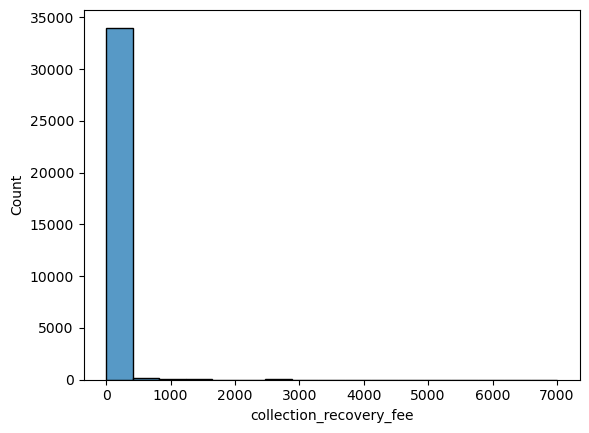

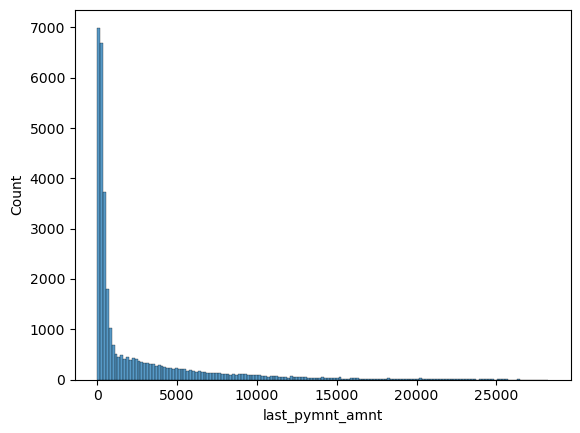

In [376]:
#Univariate analysis for Numerical Columns
for i in df_cont.columns:
    sns.histplot(x=df_cont[i])
    plt.show()

In [377]:
#Installment over Income ratio
df['Ins_mnth_inc_ratio'] = 100*df_cont['installment']/(df_cont['annual_inc']/12)

In [378]:
df_cont.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,open_acc,revol_bal,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
1,2500,2500,2500.00,59.83,30000.00,1.00,3,1687,4,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
3,10000,10000,10000.00,339.31,49200.00,20.00,10,5598,37,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.00,67.79,80000.00,17.94,15,27783,38,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79
5,5000,5000,5000.00,156.46,36000.00,11.20,9,7963,12,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03
6,7000,7000,7000.00,170.08,47004.00,23.51,7,17726,11,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76


In [379]:
df['Ins_mnth_inc_ratio'].describe()

count   34233.00
mean        6.63
std         3.93
min         0.27
25%         3.65
50%         5.89
75%         8.84
max        32.03
Name: Ins_mnth_inc_ratio, dtype: float64

In [380]:
df_cat['dti_cat']= pd.cut(df_cont['dti'],[0,10,20,30],labels=['0-10','10-20','20-30'])


In [381]:
df_cat['ins_to_income_p'] = pd.cut(df['Ins_mnth_inc_ratio'],[0,5,10,15,20,25,30,35],labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35'])
df_cat.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,inq_last_6mths,dti_cat,ins_to_income_p
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,5,0-10,0-5
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,1,10-20,5-10
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Current,other,0,10-20,0-5
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Fully Paid,wedding,3,10-20,5-10
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Fully Paid,debt_consolidation,1,20-30,0-5


In [382]:
df_cat['int_rate'] = df_cat['int_rate'].str.rstrip('%')
df_cat['int_rate'].astype(float)

1       15.27
3       13.49
4       12.69
5        7.90
6       15.96
         ... 
39710    7.43
39711    8.70
39712    8.07
39713   10.28
39716   13.75
Name: int_rate, Length: 34233, dtype: float64

### 4.3 Bivariate Analysis

In [383]:
df_cat.emp_length=df_cat.emp_length.apply(lambda x:x.translate({ ord(i) : None for i in '><+years '}))

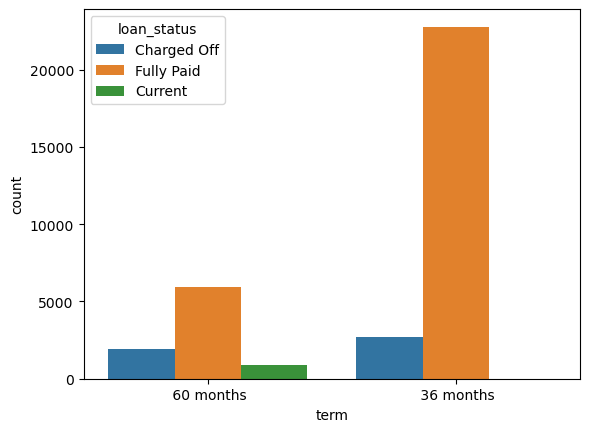

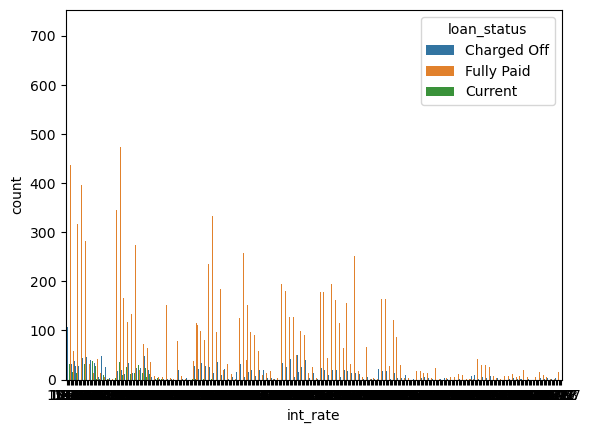

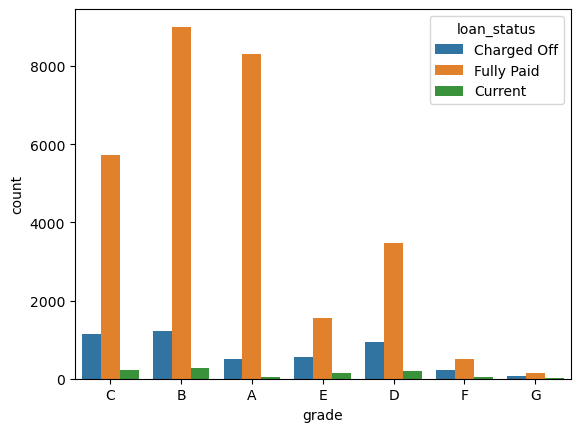

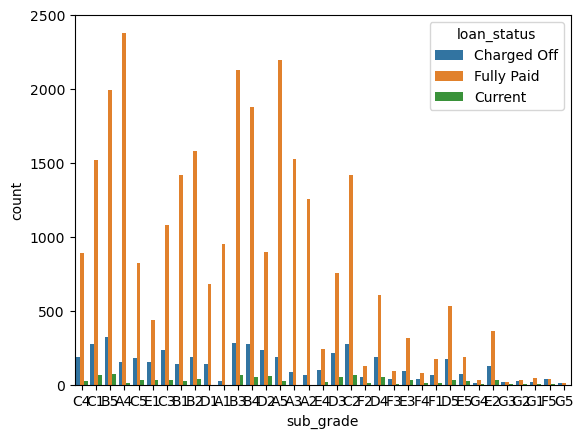

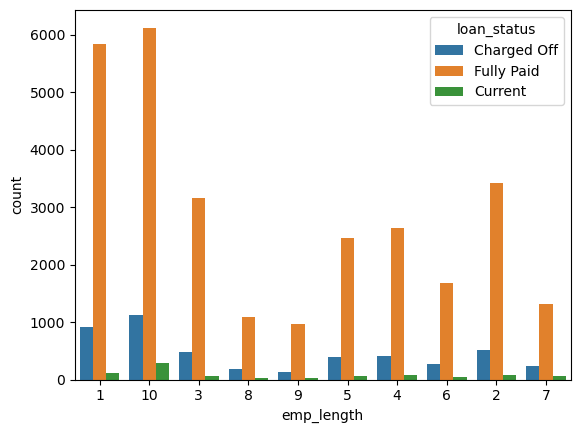

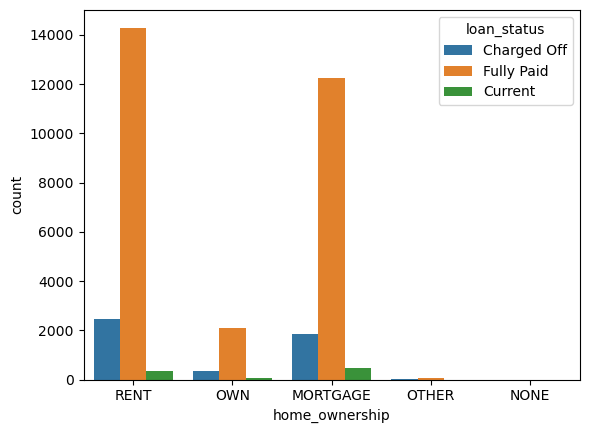

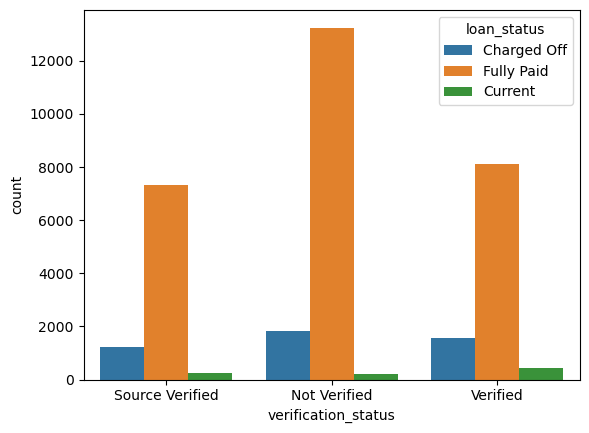

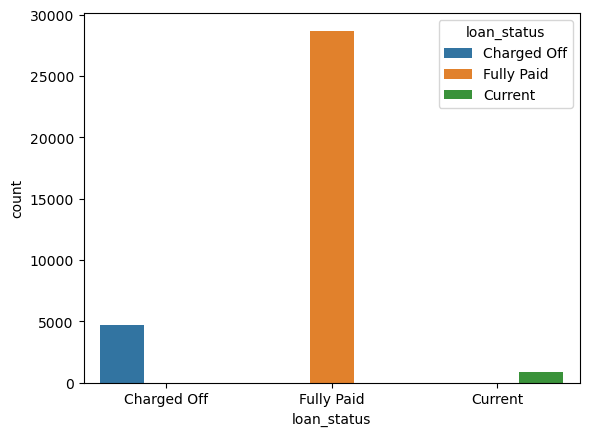

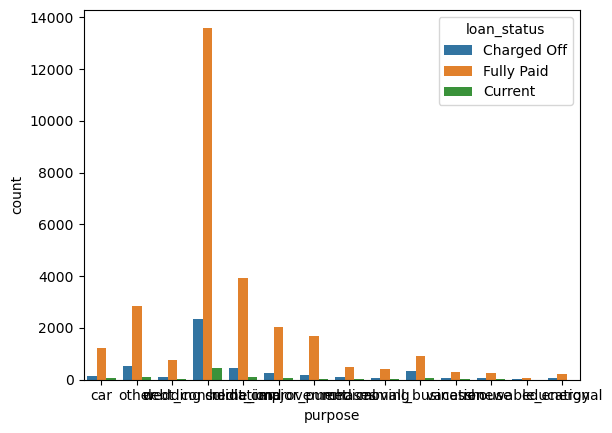

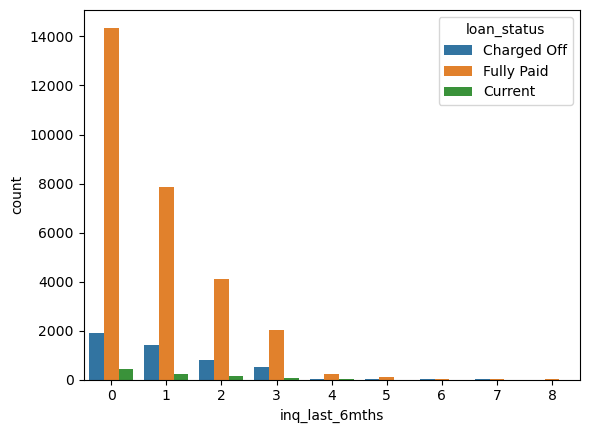

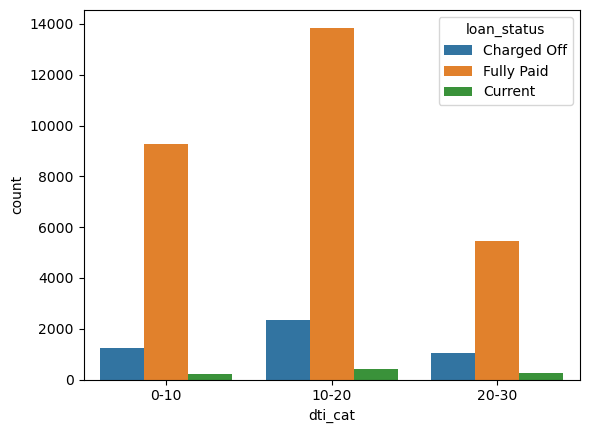

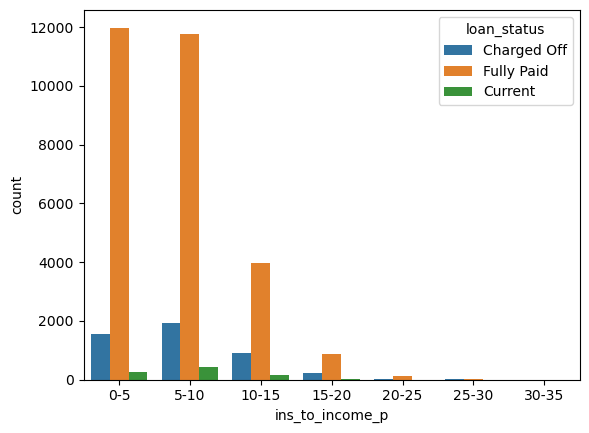

In [384]:
for i in df_cat.columns.values:
    sns.countplot(data = df_cat, x=i,hue= 'loan_status')
    plt.show()


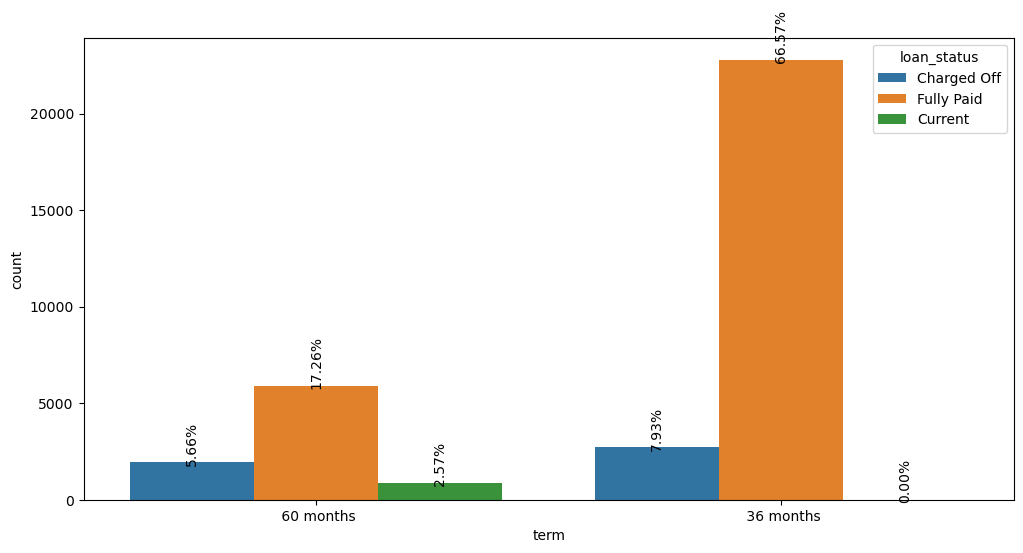

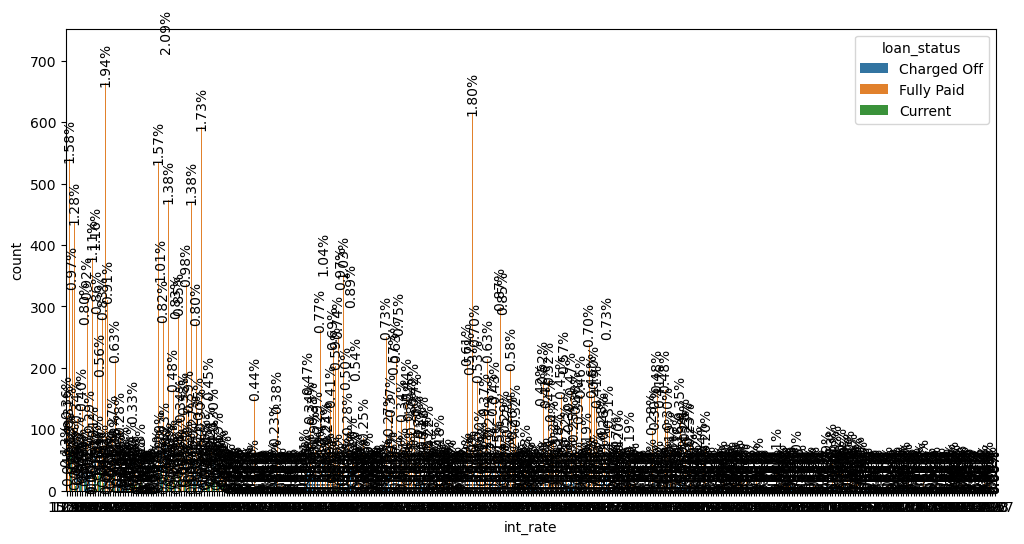

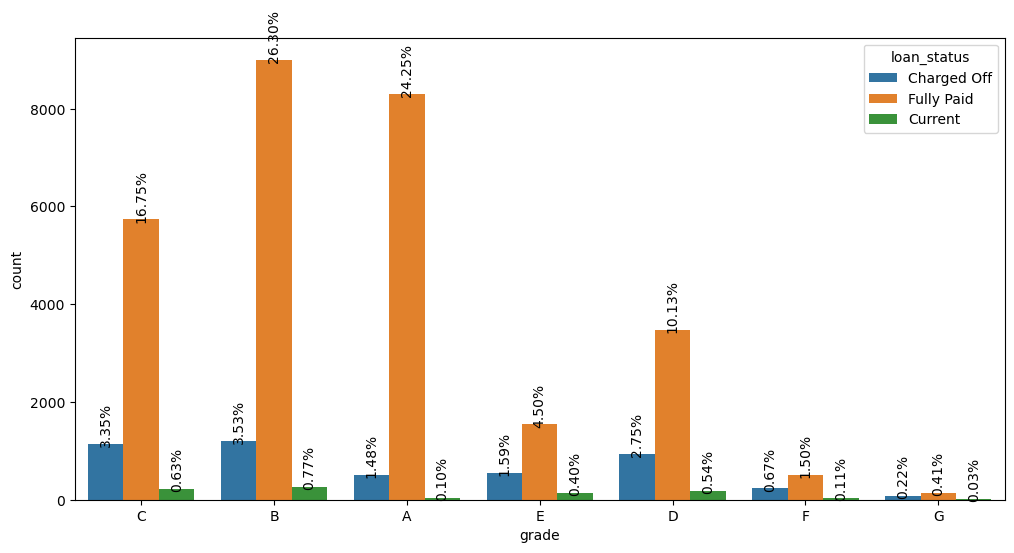

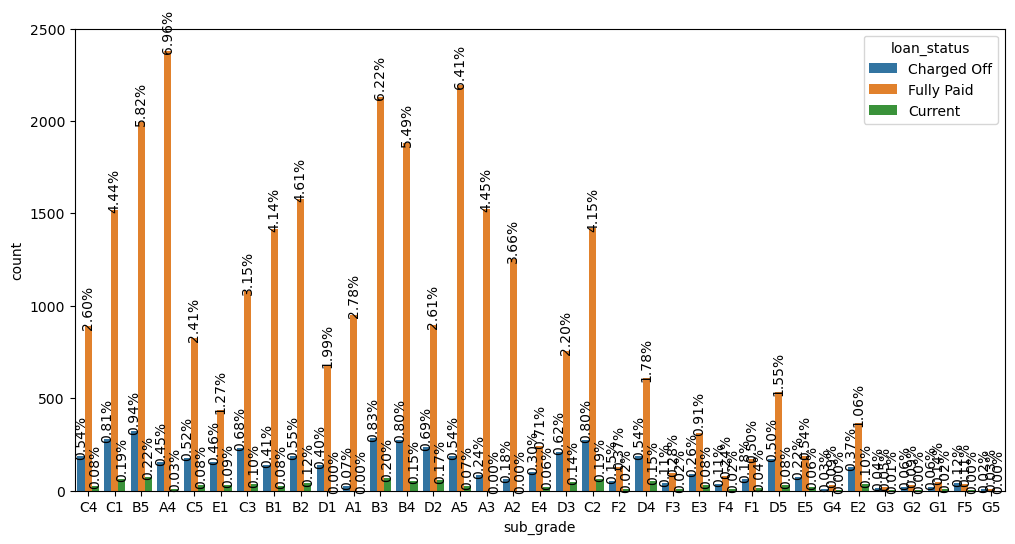

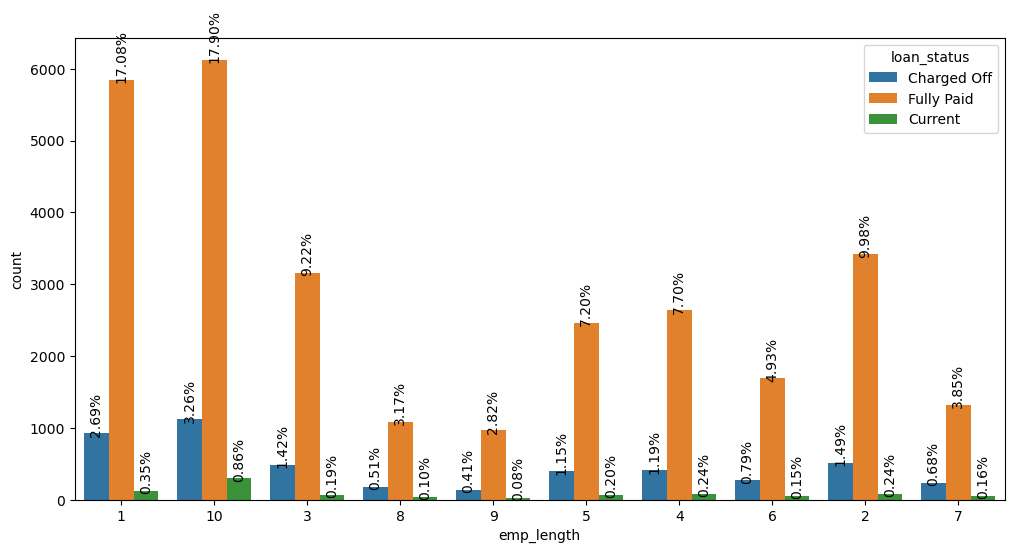

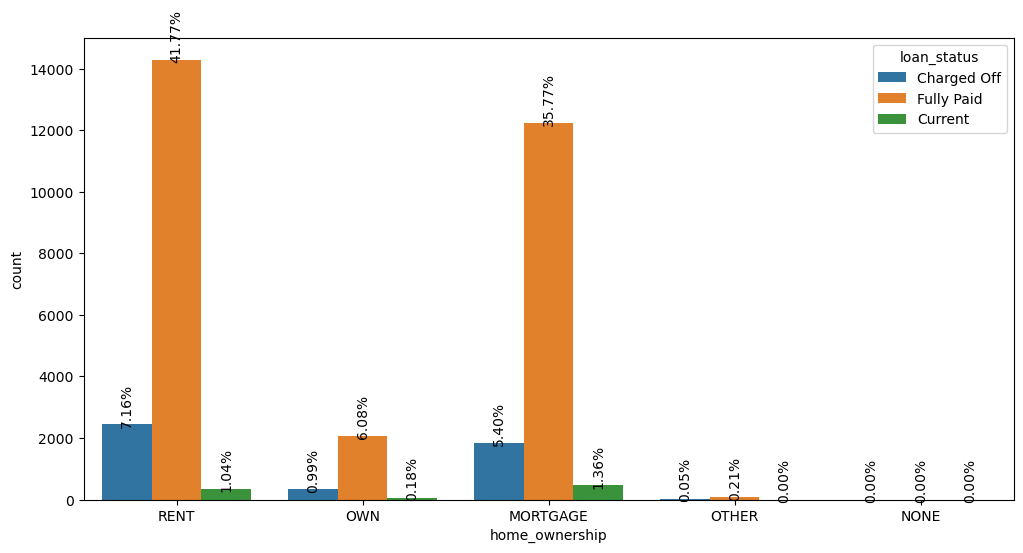

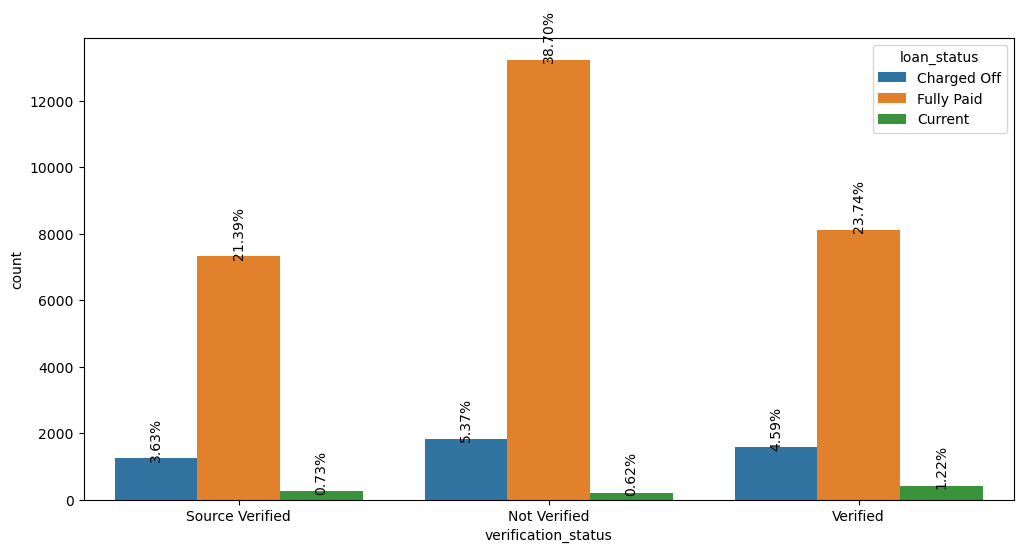

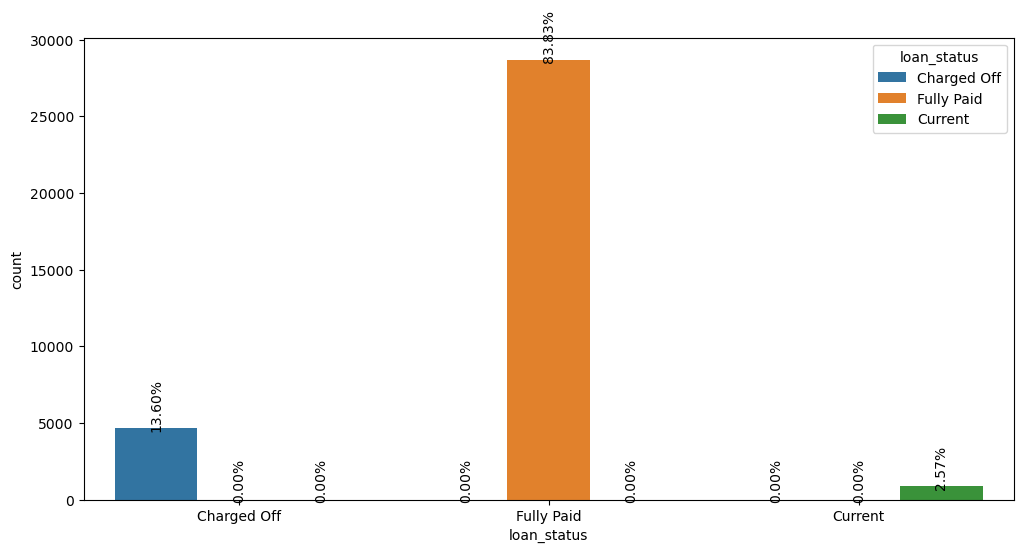

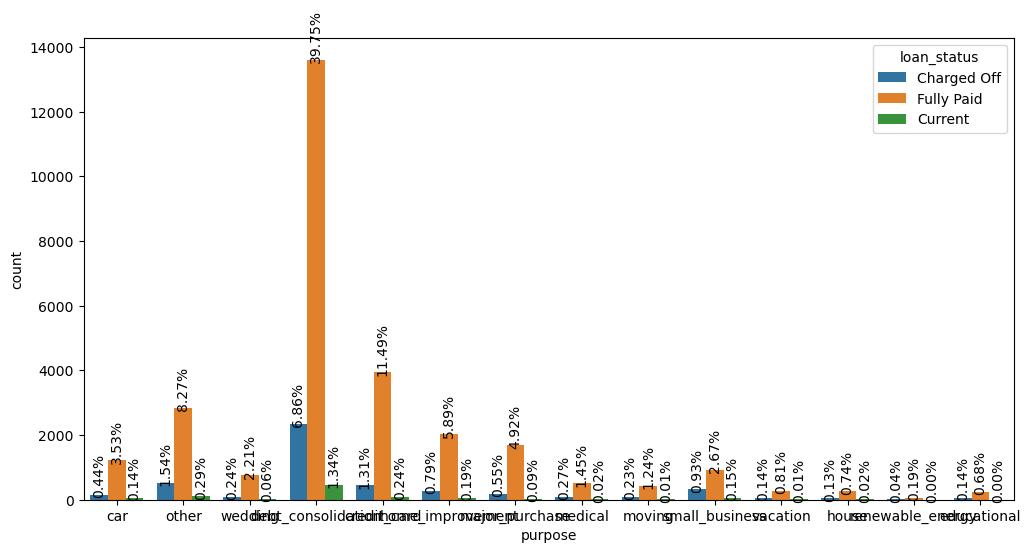

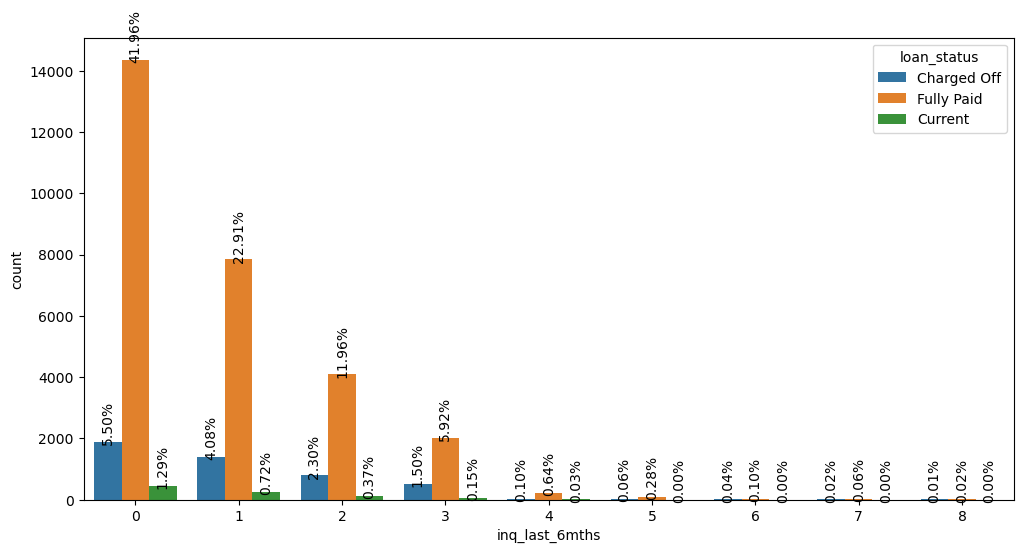

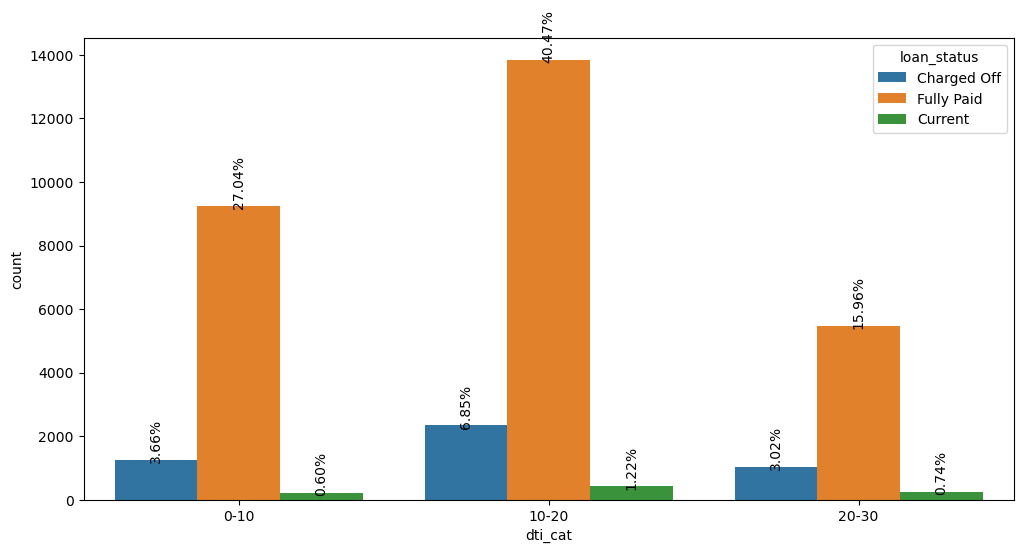

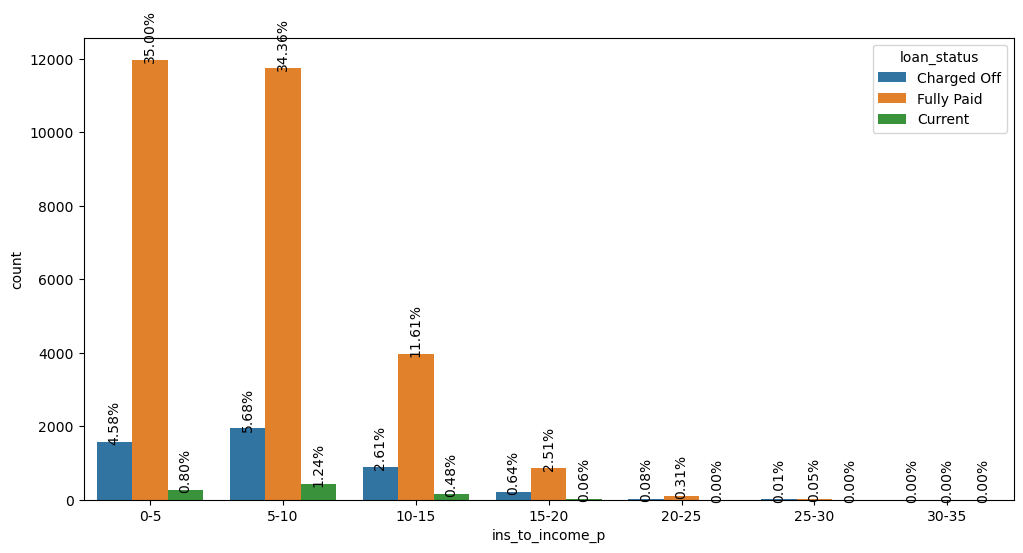

In [385]:
#Bi-variate Analysis for Categorical Columns vs Loan Status
for i in df_cat.columns.values:
    plt.figure(figsize=(12,6))
    y = sns.countplot(data = df_cat, x=i,hue= 'loan_status')
    total = len(df_cat)
    for p in y.patches:
        height = p.get_height()
        y.text(p.get_x() + p.get_width()/2,height, f'{height/total:.2%}',ha = "center",rotation = 90)
    plt.show()


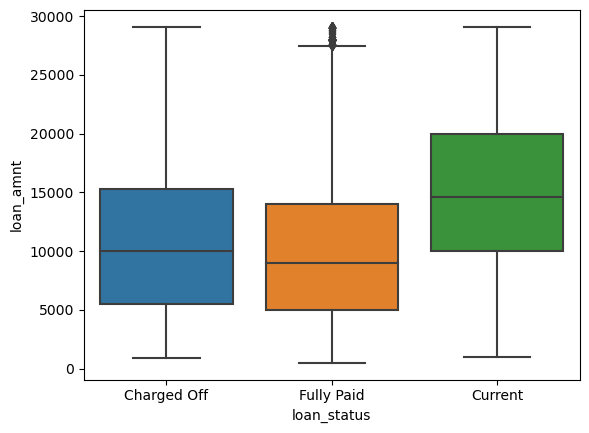

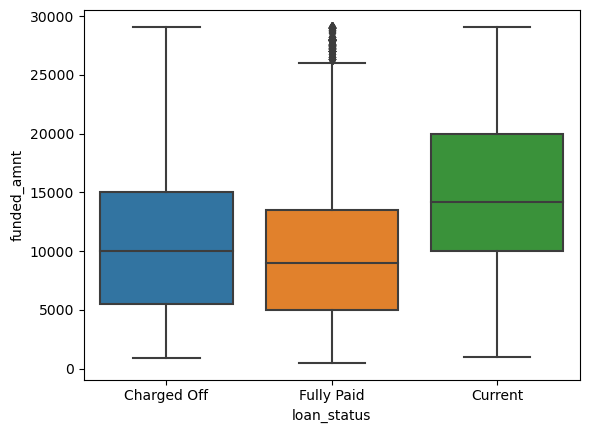

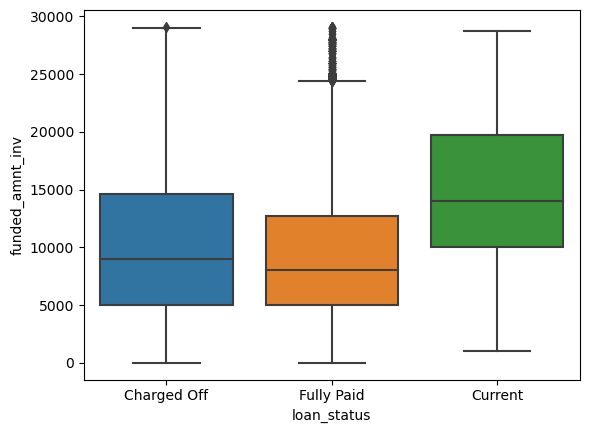

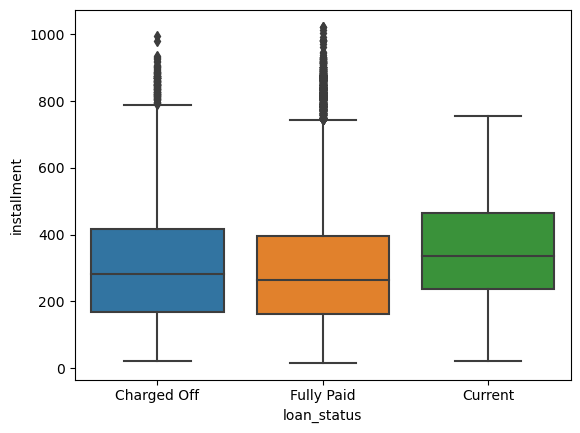

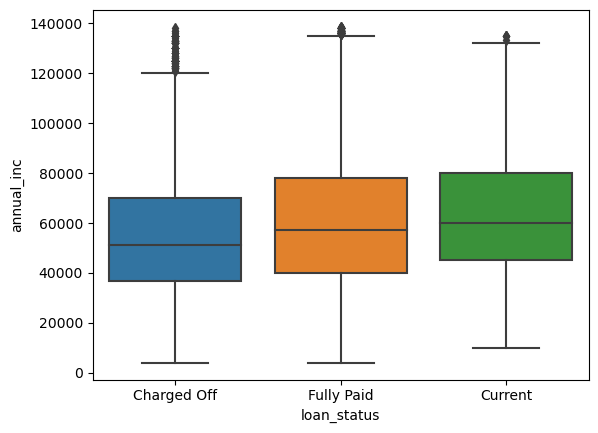

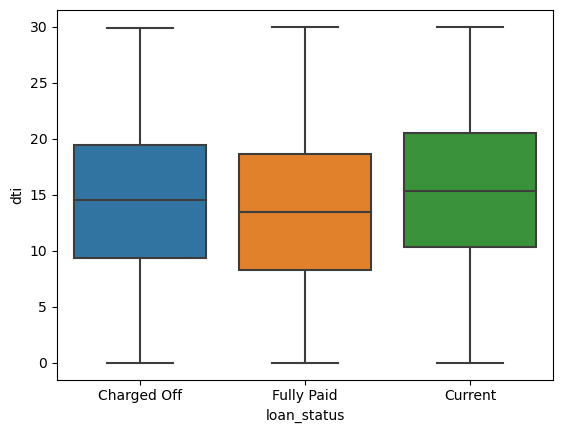

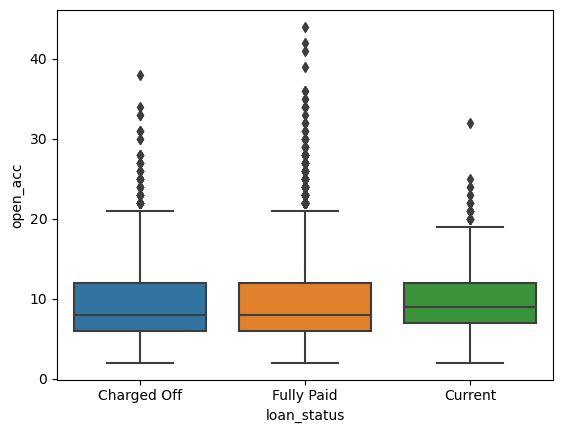

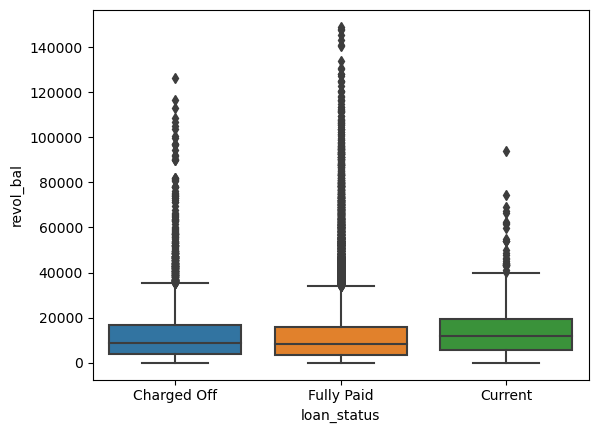

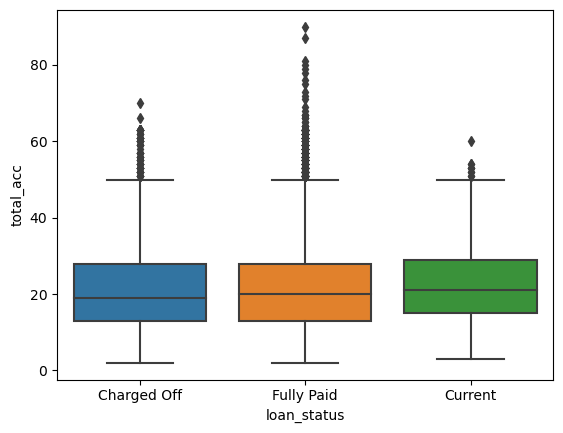

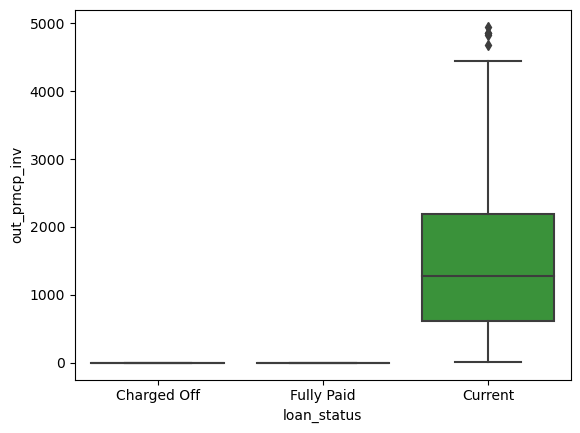

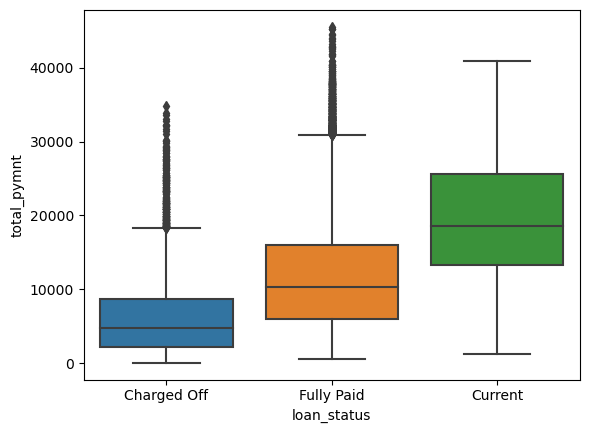

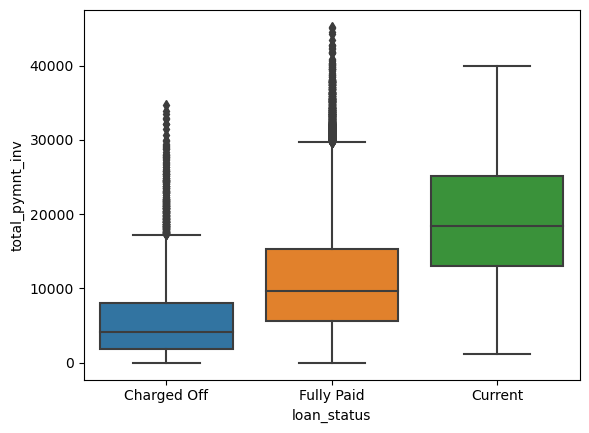

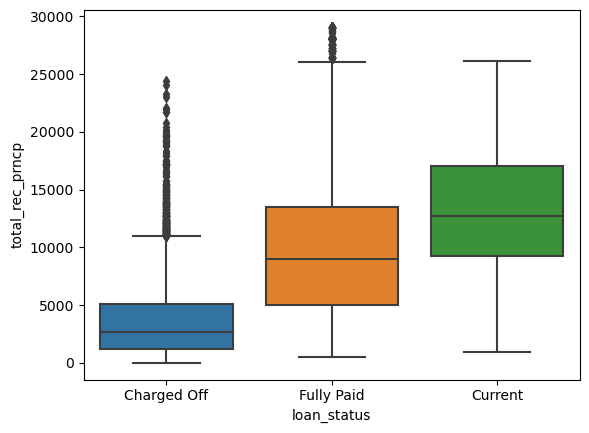

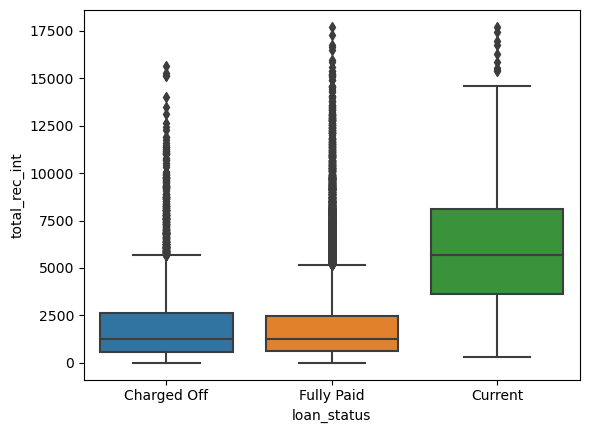

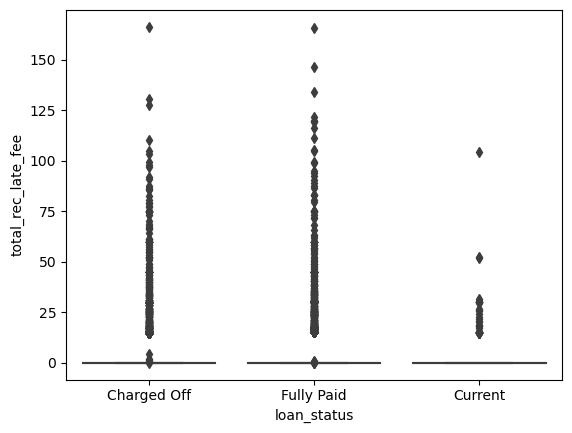

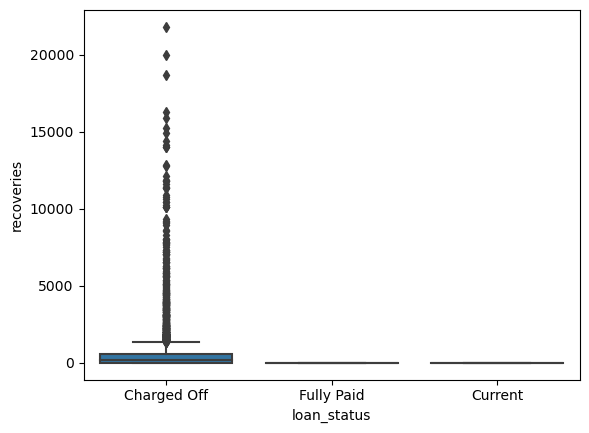

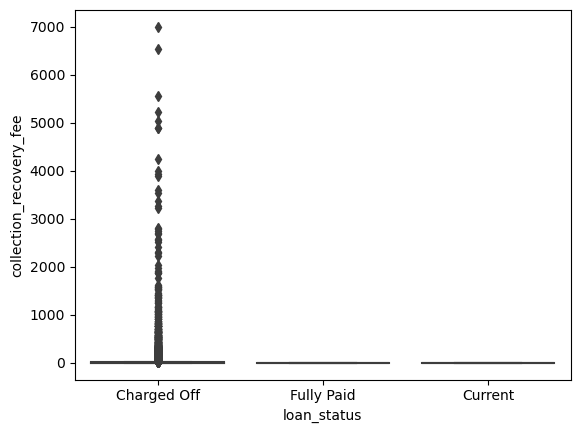

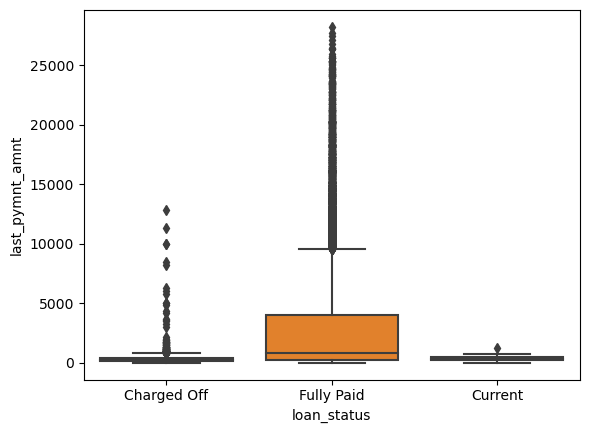

In [386]:
#Loan Status vs Numerical Columns
for i in df_cont.columns.values:
    sns.boxplot(data = df, x='loan_status',y= i)
    plt.show()

### 4.4 Multi Variate Analyis

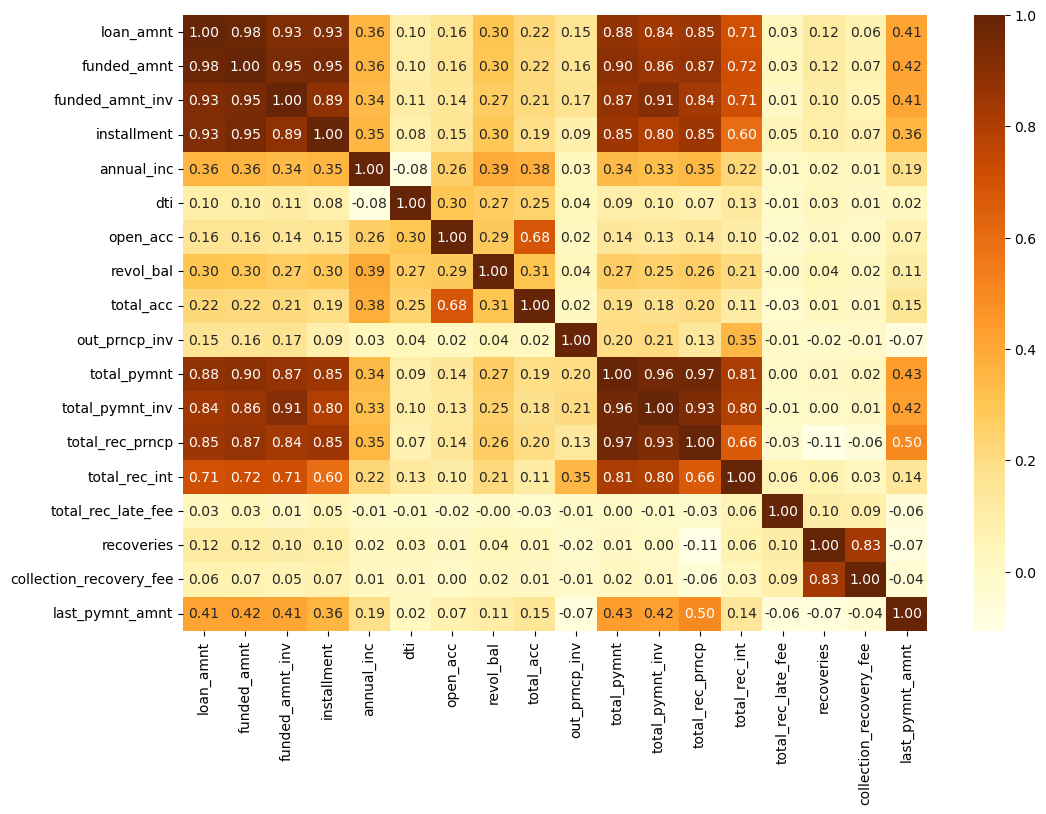

In [387]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cont.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

In [388]:
count_gb = df_cat.groupby(['loan_status','term', 'verification_status', 'home_ownership',
                       'emp_length','purpose', 'grade'])['grade'].count()
df_m = df_cat.groupby(['loan_status','term', 'verification_status', 'home_ownership',
                       'emp_length','purpose', 'grade']).count()
df_m['freq'] = list(count_gb)
df_m.reset_index(inplace=True)
df_m

,loan_status,term,verification_status,home_ownership,emp_length,purpose,grade,int_rate,sub_grade,inq_last_6mths,dti_cat,ins_to_income_p,freq
0,Charged Off,36 months,Not Verified,MORTGAGE,1,car,A,1,1,1,1,1,1
1,Charged Off,36 months,Not Verified,MORTGAGE,1,car,B,2,2,2,2,2,2
2,Charged Off,36 months,Not Verified,MORTGAGE,1,credit_card,A,1,1,1,1,1,1
3,Charged Off,36 months,Not Verified,MORTGAGE,1,credit_card,B,2,2,2,2,2,2
4,Charged Off,36 months,Not Verified,MORTGAGE,1,credit_card,C,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,Fully Paid,60 months,Verified,RENT,9,major_purchase,D,1,1,1,1,1,1
8009,Fully Paid,60 months,Verified,RENT,9,major_purchase,E,1,1,1,1,1,1
8010,Fully Paid,60 months,Verified,RENT,9,other,B,1,1,1,1,1,1
8011,Fully Paid,60 months,Verified,RENT,9,other,D,1,1,1,1,1,1


In [389]:
import plotly.express as px
fig = px.sunburst(df_m, path=['loan_status','term', 'verification_status', 'home_ownership',
                        'grade'], values='freq',
                  color='freq',
                  color_continuous_scale='rdbu_r',
                  width=960, height=600
                 )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [390]:
import plotly.express as px
fig = px.sunburst(df_m, path=['loan_status', 'verification_status',
                        'purpose','grade'], values='freq',
                  color='freq',
                  color_continuous_scale='rdbu_r',
                  width=960, height=600
                 )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()